## Analysis of Student Debt and Outcomes for Different College Types


### Data Read
- Read the 2009 and 2017 Data
- Merge the data set on school Id (UNITID)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import 2017 and 2009 dataframes
raw_2017 = pd.DataFrame(pd.read_csv("Cleaned_2017_data.csv"))
raw_2009 = pd.DataFrame(pd.read_csv("Cleaned_2009_data.csv"))
merged_df = raw_2017.merge(raw_2009[["UNITID", "GRAD_DEBT_MDN", "MD_EARN_WNE_P10"]], how="left", on = "UNITID")

### Data Cleaning
- Keep only the 4 year institutions (remove all non 4 year institutes)
- Replace object "PrivacySuppressed" in data columns by NaN values
- Convert data columns to float

In [2]:
#Remove non-4 year colleges
merged_df = merged_df.loc[merged_df["ICLEVEL"] == 1]
merged_df = merged_df.reset_index(drop=True)

#Convert PrivacySuppressed tags to NaN values
for index, row in merged_df.iterrows():
    column = 0
    for cell in row:
        if cell == "PrivacySuppressed":
            merged_df.iloc[index, column] = np.nan
        column += 1

#Convert the data columns to floats
for column in merged_df.columns[8:]:
    merged_df[column] = pd.to_numeric(merged_df[column])
    
merged_df.dtypes

UNITID                int64
INSTNM               object
CITY                 object
STABBR               object
ZIP                  object
CONTROL               int64
ICLEVEL               int64
LATITUDE            float64
LONGITUDE           float64
COMPL_RPY_3YR_RT    float64
COMPL_RPY_5YR_RT    float64
COMPL_RPY_7YR_RT    float64
GRAD_DEBT_MDN_x     float64
GRAD_DEBT_MDN_y     float64
MD_EARN_WNE_P10     float64
dtype: object

### Create a new dataframe for Year 2009
- Create a dataframe to hold institute counts and median debt for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [3]:
# Remove all the rows with NaN for "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["GRAD_DEBT_MDN_y"], inplace=False)
df1 = df.groupby(["CONTROL"])[["GRAD_DEBT_MDN_y"]].mean()

# Total institues in each category
df1["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df1["GRAD_DEBT_MDN_y"] = df1["GRAD_DEBT_MDN_y"].map("${:,.0f}".format)

# Convert to dataframe
df1 = pd.DataFrame(df1).reset_index()
del df1["CONTROL"]

# Rename Column and Index
df1.rename(columns={"GRAD_DEBT_MDN_y":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df1.index.rename('Control', inplace=True)

# Change column order
df1 = df1[["Count", "Median Debt"]]

### Create a new dataframe for Year 2017
- Create a dataframe to hold institute counts and median debt for each institute type
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [4]:
# Remove all the rows with NaN for "Graduate Debt"
df = merged_df.dropna(axis=0, subset=["GRAD_DEBT_MDN_x"], inplace=False)
df2 = df.groupby(["CONTROL"])[["GRAD_DEBT_MDN_x"]].mean()

# Total institues in each category
df2["Count"] = df.groupby(["CONTROL"])["UNITID"].count()


# Give displayed data cleaner formatting
df2["GRAD_DEBT_MDN_x"] = df2["GRAD_DEBT_MDN_x"].map("${:,.0f}".format)

# Convert to dataframe
df2 = pd.DataFrame(df2).reset_index()
del df2["CONTROL"]

# Rename Column and Index
df2.rename(columns={"GRAD_DEBT_MDN_x":"Median Debt"},
           index={0:"Public", 1:"Priv. NonProfit", 2:"Priv. ForProfit"},
           inplace=True) 

# Name index 
df2.index.rename('Control', inplace=True)

# Change column order
df2 = df2[["Count", "Median Debt"]]

### Merge 2009 and 2017 dataframe
- Merge 2009 and 2017 datafrmaes to create a new summary dataframe to hold median debt and retention rate
- Rename the columns to indicate 2009 and 20017 year data
- Institute type:
    - Public
    - Private Non Profit
    - Private For Profit

In [5]:
# Create combined 2009 and 2017 summary
summary_data = df1.merge(df2,left_index=True,right_index=True,how="inner")
summary_data.rename(columns={"Count_x":"Count_2009",
                             "Median Debt_x":"Median Debt_2009",
                             "Count_y":"Count_2017",
                             "Median Debt_y":"Median Debt_2017"},
                    inplace="True")

summary_data

,Count_2009,Median Debt_2009,Count_2017,Median Debt_2017
Control,,,,
Public,693,"$14,533",755,"$19,430"
Priv. NonProfit,1190,"$17,609",1335,"$23,624"
Priv. ForProfit,325,"$18,637",583,"$25,583"


In [6]:
df.head()

,UNITID,INSTNM,CITY,STABBR,ZIP,CONTROL,ICLEVEL,LATITUDE,LONGITUDE,COMPL_RPY_3YR_RT,COMPL_RPY_5YR_RT,COMPL_RPY_7YR_RT,GRAD_DEBT_MDN_x,GRAD_DEBT_MDN_y,MD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,35762,1,1,34.783368,-86.568502,0.429326,0.511318,0.563871,32750.0,22666.5,32600.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,1,1,33.505697,-86.799345,0.618270,0.673330,0.740593,21833.0,14500.0,42800.0
2,100690,Amridge University,Montgomery,AL,36117-3553,2,1,32.362609,-86.174010,0.439024,0.550725,0.679245,22890.0,15500.0,39000.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,1,1,34.724557,-86.640449,0.680887,0.742248,0.816953,22647.0,16500.0,48300.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,1,1,32.364317,-86.295677,0.366038,0.442308,0.491968,31500.0,24728.0,27600.0


In [8]:
public = df.loc[df["CONTROL"]==1]["GRAD_DEBT_MDN_x"]
nonprofit = df.loc[df["CONTROL"]==2]["GRAD_DEBT_MDN_x"]
forprofit = df.loc[df["CONTROL"]==3]["GRAD_DEBT_MDN_x"]

stats.f_oneway(public, nonprofit, forprofit)

F_onewayResult(statistic=169.27173228215077, pvalue=6.121904887792162e-70)

### Plot
1. Year 2009: Display debt distribution for different college type
2. Year 2017: Display debt distribution for different college type 

In [9]:
# Assign colors for each institution type and the names
colors = ['b', 'g', 'r']
names = ["Public", "Private Non Profit", "Private For Profit"]

In [10]:
#Define Bins
bin_width = 1000
bins = range(0, 51000, bin_width)

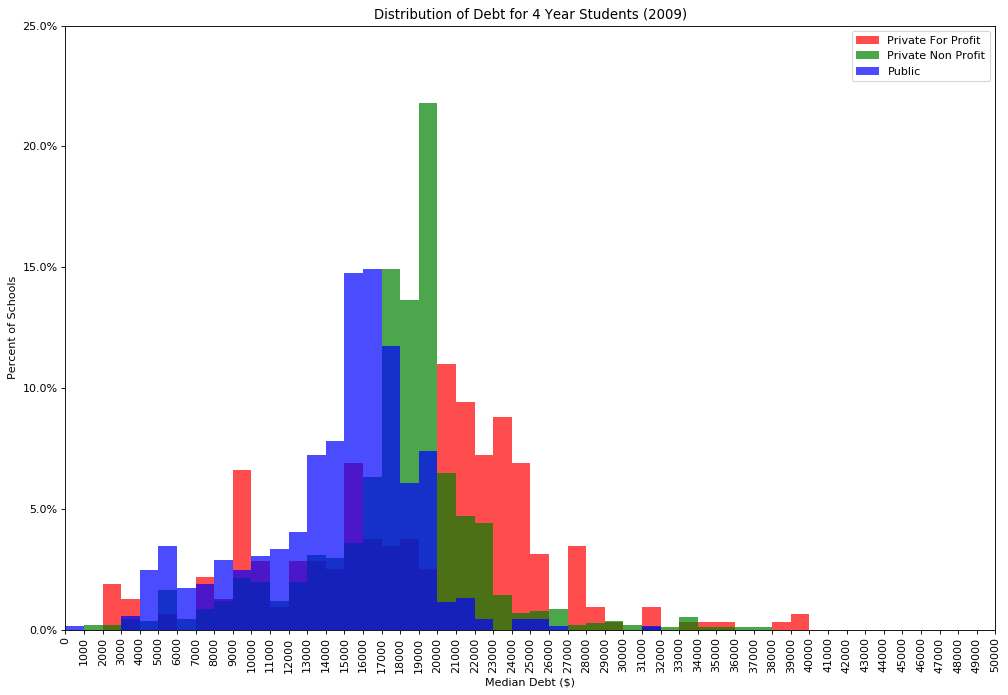

In [11]:
# Make a separate list for each institution type for 2009
x1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_y'])
x2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_y'])
x3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_y'])

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2009)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, rotation="vertical")
plt.xlim(0, 50000)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

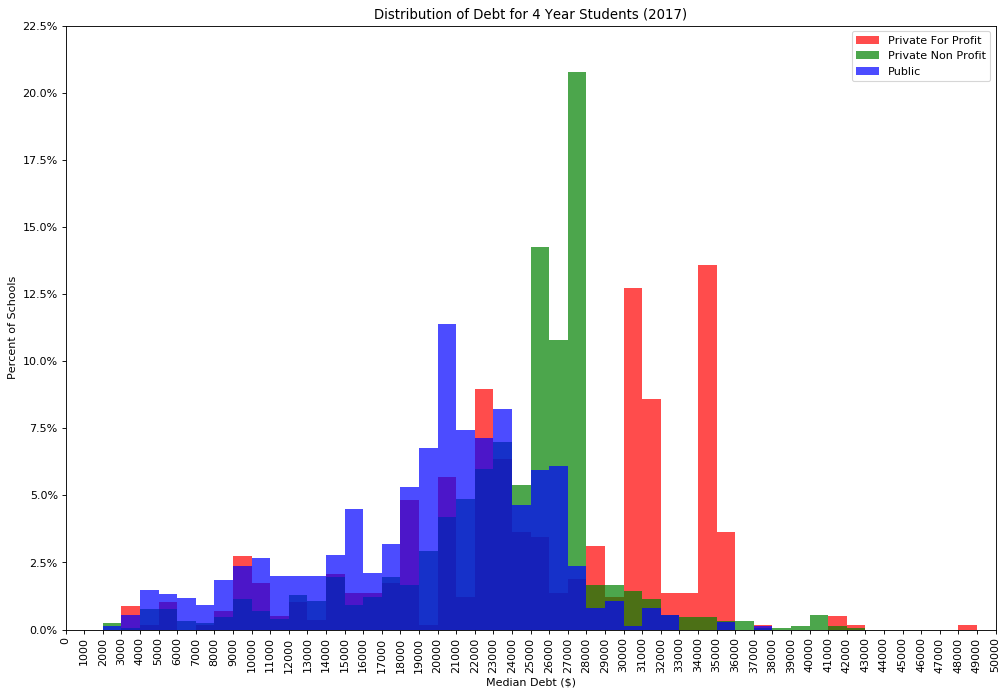

In [12]:
# Make a separate list for each institution type for 2017
y1 = list(df[df['CONTROL'] == 1]['GRAD_DEBT_MDN_x'])
y2 = list(df[df['CONTROL'] == 2]['GRAD_DEBT_MDN_x'])
y3 = list(df[df['CONTROL'] == 3]['GRAD_DEBT_MDN_x'])

# Create the plot
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha=0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Distribution of Debt for 4 Year Students (2017)"
plt.title(graph_title)
plt.xlabel("Median Debt ($)")
plt.ylabel("Percent of Schools")

# Convert y-axis to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Plot formatting
plt.legend()
locs, labels = plt.xticks()
plt.xticks(bins, rotation="vertical")
plt.xlim(0, 50000)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Repayment Distribution
1. Plot distribution of 3-years repayment rate for each institite type
2. Plot distribution of 5-years repayment rate for each institite type
3. Plot distribution of 7-years repayment rate for each institite type

In [14]:
# Convert Repayment Rates to Percentages
merged_df['COMPL_RPY_3YR_RT_PERCENT'] = merged_df['COMPL_RPY_3YR_RT'] *100
merged_df['COMPL_RPY_5YR_RT_PERCENT'] = merged_df['COMPL_RPY_5YR_RT'] *100
merged_df['COMPL_RPY_7YR_RT_PERCENT'] = merged_df['COMPL_RPY_7YR_RT'] *100

#Define Bins
bin_width = 5
bins = np.arange(0, 105, bin_width)

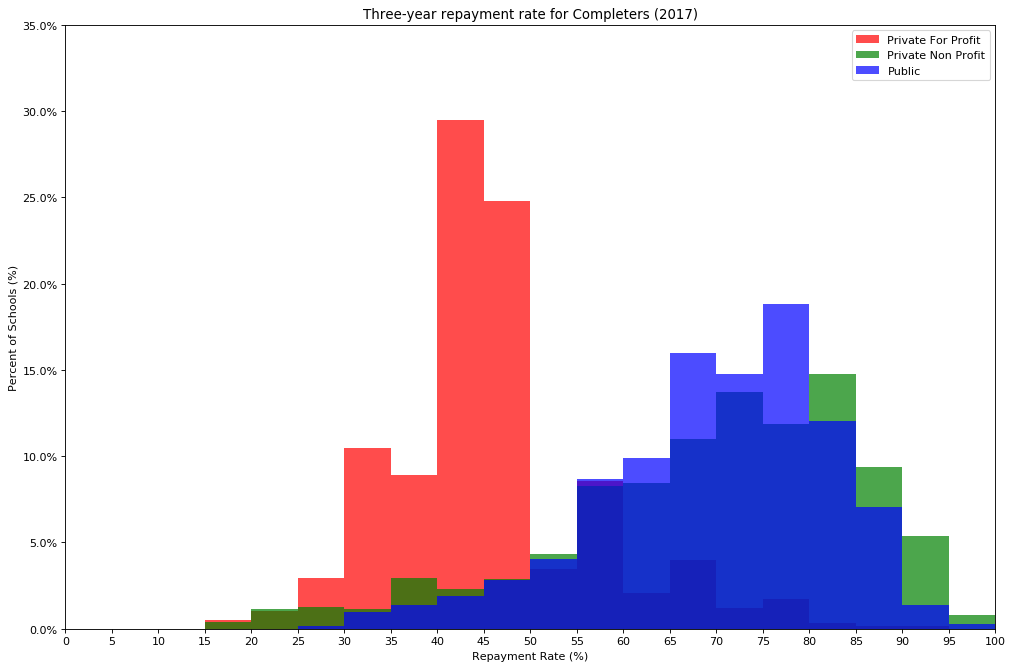

In [15]:
# Make a separate list for each institution type for 3-year repayment 
x1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_3YR_RT_PERCENT'])
x2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_3YR_RT_PERCENT'])
x3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_3YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([x1, x2, x3], histtype="stepfilled", bins=bins, density=True, color=colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Three-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

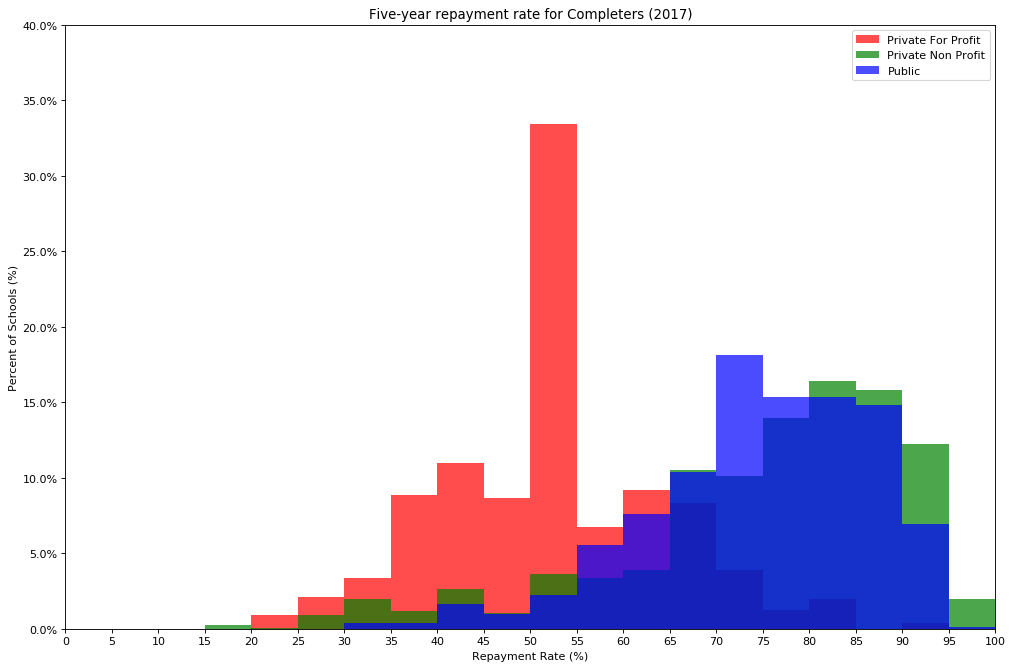

In [16]:
# Make a separate list for each institution type for 5-year repayment
y1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_5YR_RT_PERCENT'])
y2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_5YR_RT_PERCENT'])
y3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_5YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([y1, y2, y3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Five-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

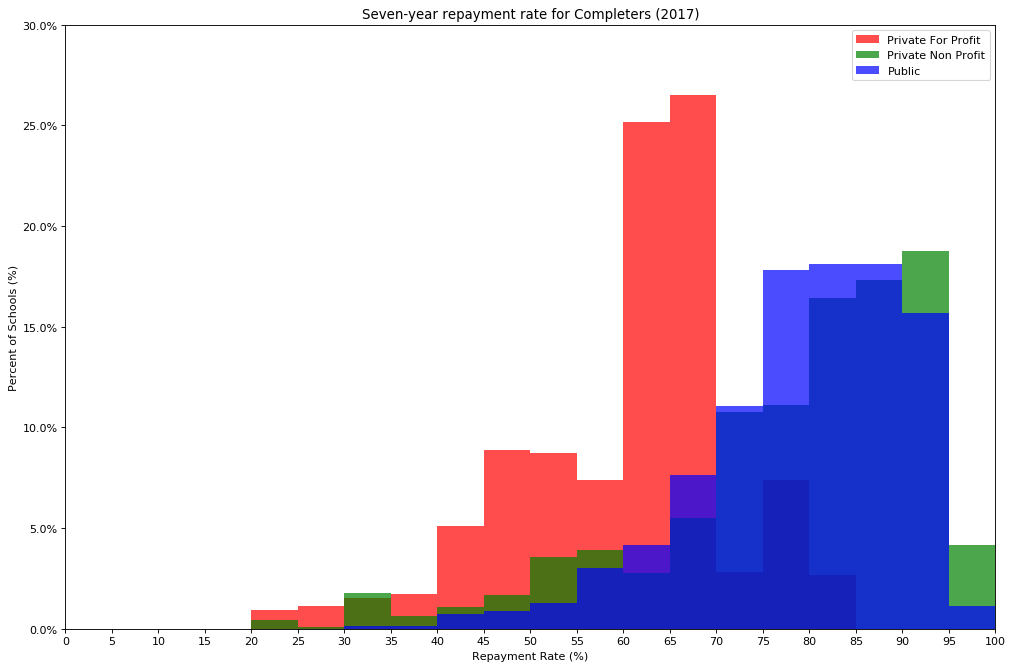

In [17]:
# Make a separate list for each institution type for 7-year repayment
z1 = list(merged_df[merged_df['CONTROL'] == 1]['COMPL_RPY_7YR_RT_PERCENT'])
z2 = list(merged_df[merged_df['CONTROL'] == 2]['COMPL_RPY_7YR_RT_PERCENT'])
z3 = list(merged_df[merged_df['CONTROL'] == 3]['COMPL_RPY_7YR_RT_PERCENT'])

# Multiple subplos with one figure
plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

# Make the histogram using a list of lists
# Normalize the school counts and assign colors and names
plt.hist([z1, z2, z3], histtype="stepfilled", bins = bins, density=True, color = colors, label=names, alpha =0.7)

# Add labels to X and Y axes :: Add title
graph_title = "Seven-year repayment rate for Completers (2017)"
plt.title(graph_title)
plt.xlabel("Repayment Rate (%)")
plt.ylabel("Percent of Schools (%)")

# Plot formatting
plt.legend(loc="upper right")
plt.xlim(0, 100)
plt.xticks(bins)

# Convert y-axis from normalized units to percentages
locs, labels = plt.yticks()
labels = [str(round(loc*bin_width*100, 1)) + "%" for loc in locs]
plt.yticks(locs, labels)

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

### Plot Debt on Graduation against Future Earnings
1. Take a sample of the cleaned data
2. Create a scatter plot of median graduate debt against median earnings 10 years after graduation

In [18]:
#Create a smaller sample to test with
test_df = merged_df[["GRAD_DEBT_MDN_y", "MD_EARN_WNE_P10", "CONTROL"]]
test_df = pd.DataFrame(test_df.dropna())
test_df = test_df.sample(n=1000)
test_df = test_df.reset_index()

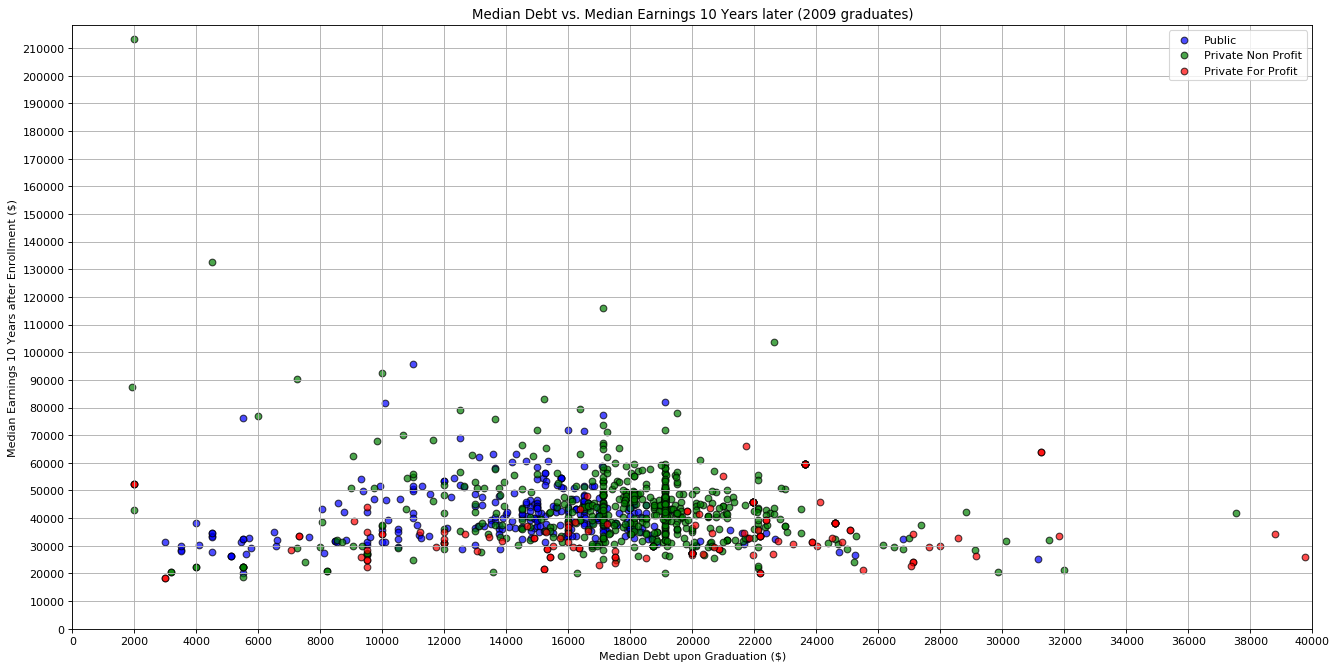

In [19]:
public_df = test_df.loc[test_df["CONTROL"]==1]
nonprofit_df = test_df.loc[test_df["CONTROL"]==2]
forprofit_df = test_df.loc[test_df["CONTROL"]==3]

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(public_df["GRAD_DEBT_MDN_y"], public_df["MD_EARN_WNE_P10"], 
           label=names[0], color=colors[0], edgecolors="k", alpha=0.7)
plt.scatter(nonprofit_df["GRAD_DEBT_MDN_y"], nonprofit_df["MD_EARN_WNE_P10"],
           label=names[1], color=colors[1], edgecolors="k", alpha=0.7)
plt.scatter(forprofit_df["GRAD_DEBT_MDN_y"], forprofit_df["MD_EARN_WNE_P10"],
           label=names[2], color=colors[2], edgecolors="k", alpha=0.7)

# Setup axis labels and ticks
plt.xticks(np.arange(0, max(test_df["GRAD_DEBT_MDN_y"]) + 500, 2000))
plt.yticks(np.arange(0, max(test_df["MD_EARN_WNE_P10"]) + 5000, 10000))
plt.ylabel("Median Earnings 10 Years after Enrollment ($)")
plt.xlabel("Median Debt upon Graduation ($)")
plt.ylim(0, max(test_df["MD_EARN_WNE_P10"]) + 5000)
plt.xlim(0, 40000)
graph_title = "Median Debt vs. Median Earnings 10 Years later (2009 graduates)"
plt.title(graph_title)
plt.grid()
plt.legend()

# Save fig
file_name = graph_title.replace(" ", "_")
plt.savefig(file_name+".png")

## Check debt variation by state

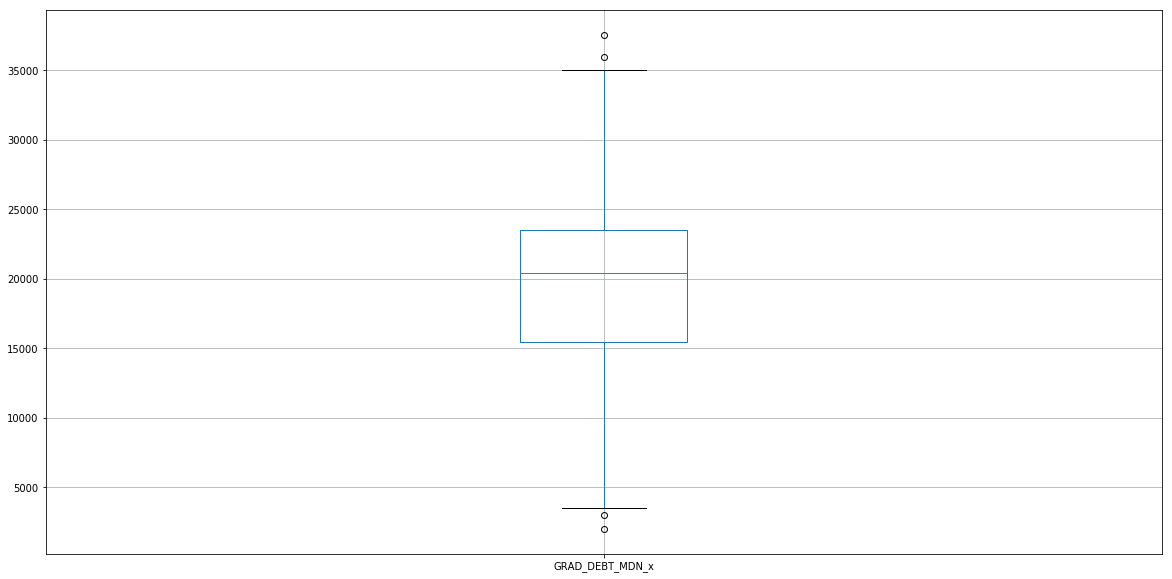

In [26]:
state_df = merged_df[["GRAD_DEBT_MDN_x", "STABBR", "CONTROL"]]
state_df = pd.DataFrame(state_df.dropna())
public_df = state_df.loc[state_df["CONTROL"]==1]
nonprofit_df = state_df.loc[state_df["CONTROL"]==2]
forprofit_df = state_df.loc[state_df["CONTROL"]==3]

state_df.boxplot("GRAD_DEBT_MDN_x", by="STABBR", figsize=(20, 10))

### Create a map
1. Take a sample of the cleaned data
2. Create a scatter plot of median graduate debt against median earnings 10 years after graduation

In [ ]:
# Create a gmap with the top 20 most expensive state schools

# Configure gmaps
import gmaps
import gmaps.datasets
from config import gkey
import pandas as pd
gmaps.configure(api_key=gkey)


heatmap_df = merged_df.loc[merged_df["CONTROL"]==1][["LATITUDE", "LONGITUDE", "GRAD_DEBT_MDN_x"]]
heatmap_df = heatmap_df.dropna()
heatmap_df = heatmap_df.sort_values("GRAD_DEBT_MDN_x", ascending=False).head(100)

# 
locations = heatmap_df[["LATITUDE", "LONGITUDE"]]
weights = heatmap_df["GRAD_DEBT_MDN_x"]

In [ ]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weights, point_radius=10)
#heat_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False, point_radius=1)

markers = gmaps.marker_layer(locations, hover_text="hover_text")

# Add layer
#fig.add_layer(markers)
fig.add_layer(heat_layer)

# Display figure
fig